---
2024-02-02자 분석 스타트
목표 : 어제 이어서 다양한 기준에서 분석 및 시각화를 해보는 것

문제점01 : 데이터가 중간중간 이해할 수 없는 부분이 조금 씩 있거나 가장 중요하다고 생각했던 최대 동시 접속자수(Peak CCU)가 상당히 불안정한 데이터 같음

문제점02 : 메타스코어 또한0점인것을 빼면 512개정도로 확 줄긴함 메타스코어를 제외하고 유저간의 평가만으로 다른 것이랑 비교가 추가적으로 더 필요할 듯 함

문제점03 : 장르, 테그, 개발사, 공급사, ','로 묶여있어서 비슷한 회사 같은데 다르게 붙어있는 경우가 많음 협업을 한 게임도 있는거같고 이걸 어떻게 나눠야 할지 고민

    왜냐 개발사를 나눴는데 그러면 게임이 각각 편성이 될것이고 이러면 열이 엄청나게 늘어남 같은게임인데 분석 및 시각화시 다르게 편성되는것이 큰 문제

문제점04 : 전체적인 데이터간의 간극이 너무 큼!!! 압도적 1위 들이 좀 많은 듯

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 메타스코어를 기준으로 여러가지 시각화 해보기

In [2]:
games_df01 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')
selected_column01 = ['AppID', 'Name', 'Peak CCU', 'Price', 'Metacritic score', 'Positive', 'Negative', 'About the game', 'Website',
                     'Developers', 'Publishers','Genres', 'Tags', 'Age_Category']
analyze_game01 = games_df01[selected_column01]
analyze_game01 = analyze_game01[analyze_game01['Metacritic score'] != 0]

<ipython-input-5-d282f053c2ee>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Peak CCU', data=top_10_games, palette='viridis')


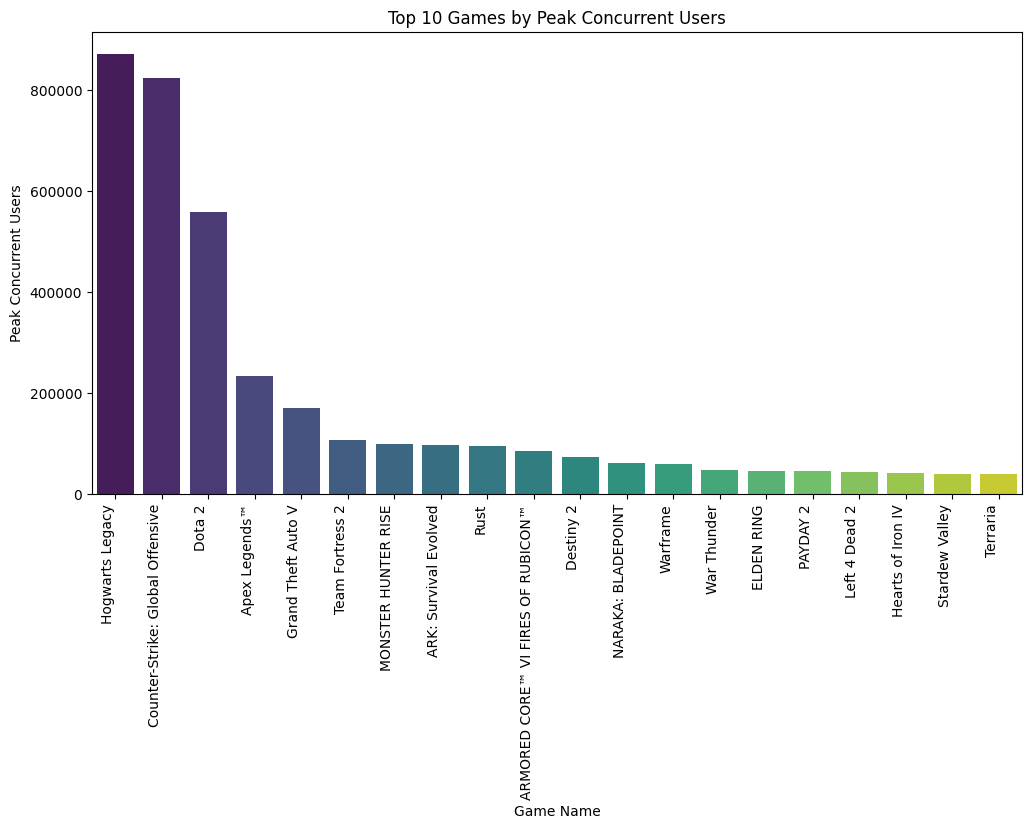

In [5]:
#25퍼 이상 동시 접속자 수 기준
median_concurrent_players = np.median(analyze_game01['Peak CCU'])
YOUR_MIN_CONCURRENT_PLAYERS = median_concurrent_players * 0.25

# 최고 동시 접속자 수가 어느 정도 이상인 게임 또는 가격이 $50 이상인 게임 추출
filtered_games = analyze_game01[(analyze_game01['Peak CCU'] >= YOUR_MIN_CONCURRENT_PLAYERS) |
                                (analyze_game01['Price'] >= 50)]

# 최상위 20개 게임 선택
top_20_games = filtered_games.nlargest(20, 'Peak CCU')

#최고 동시접속자 기준
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Peak CCU', data=top_10_games, palette='viridis')
plt.title('Top 10 Games by Peak Concurrent Users')
plt.xlabel('Game Name')
plt.ylabel('Peak Concurrent Users')
plt.xticks(rotation=90, ha='right')
plt.show()

In [6]:
top_20_games

,AppID,Name,Peak CCU,Price,Metacritic score,Positive,Negative,About the game,Website,Developers,Publishers,Genres,Tags,Age_Category
1665,990080,Hogwarts Legacy,872138,59.99,84,33521,2000,Hogwarts Legacy is an open-world action RPG se...,https://www.hogwartslegacy.com/,Avalanche Software,Warner Bros. Games,"Action,Adventure,RPG","Magic,Fantasy,Open World,Adventure,Singleplaye...",전체이용가
1125,730,Counter-Strike: Global Offensive,825215,0.00,83,5764420,766677,Counter-Strike: Global Offensive (CS: GO) expa...,http://blog.counter-strike.net/,"Valve,Hidden Path Entertainment",Valve,"Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",전체이용가
462,570,Dota 2,558759,0.00,90,1477153,300437,"The most-played game on Steam. Every day, mill...",http://www.dota2.com/,Valve,Valve,"Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",전체이용가
21,1172470,Apex Legends™,235067,0.00,88,415524,66608,"Conquer with character in Apex Legends, a free...",https://www.ea.com/games/apex-legends,Respawn Entertainment,Electronic Arts,"Action,Adventure,Free to Play","Free to Play,Multiplayer,Battle Royale,Shooter...",전체이용가
1387,271590,Grand Theft Auto V,170527,0.00,96,1171197,210154,"When a young street hustler, a retired bank ro...",http://www.rockstargames.com/V/,Rockstar North,Rockstar Games,"Action,Adventure","Open World,Action,Multiplayer,Automobile Sim,C...",청소년
750,440,Team Fortress 2,107702,0.00,92,823693,56683,The most fun you can have online - PC Gamer Is...,http://www.teamfortress.com/,Valve,Valve,"Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",전체이용가
942,1446780,MONSTER HUNTER RISE,99009,59.99,87,37494,5799,Rise to the challenge and join the hunt! In Mo...,https://www.monsterhunter.com/rise-steam/,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",Action,"Action,Online Co-Op,RPG,Hunting,Action RPG,JRP...",전체이용가
167,346110,ARK: Survival Evolved,98215,29.99,70,461567,98701,"As a man or woman stranded naked, freezing and...",http://www.playark.com,"Studio Wildcard,Instinct Games,Efecto Studios,...",Studio Wildcard,"Action,Adventure,Indie,Massively Multiplayer,RPG","Open World Survival Craft,Survival,Open World,...",전체이용가
851,252490,Rust,96112,39.99,69,703687,108223,The only aim in Rust is to survive. Everything...,http://rust.facepunch.com/,Facepunch Studios,Facepunch Studios,"Action,Adventure,Indie,Massively Multiplayer,RPG","Survival,Crafting,Multiplayer,Open World,Open ...",청소년
1852,1888160,ARMORED CORE™ VI FIRES OF RUBICON™,85852,59.99,87,23716,4194,Combining FromSoftware’s longstanding expertis...,NaN,FromSoftware Inc.,"FromSoftware Inc.,Bandai Namco Entertainment Inc.",Action,"Mechs,Character Customization,Third Person,3D,...",어린이


In [8]:
import plotly.express as px

# 긍정 리뷰 비율 계산
analyze_game01['Positive_Rate'] = analyze_game01['Positive'] / (analyze_game01['Positive'] + analyze_game01['Negative'])

fig = px.scatter(analyze_game01, x='Metacritic score', y='Positive_Rate', hover_data=['Name'])
fig.show()

In [9]:
# 부정 리뷰 비율 계산
analyze_game01['Negative_Rate'] = analyze_game01['Negative'] / (analyze_game01['Positive'] + analyze_game01['Negative'])

fig = px.scatter(analyze_game01, x='Metacritic score', y='Negative_Rate', hover_data=['Name'])
fig.show()

어디를 기준으로 자르는거에 따라 달라지겠지만, 각 비율별로 확실히 점수가 높더라도 유저 평가 점수가 낮은 게임들이 분명 존재하긴함

예시로 토탈워, 아노2070 컴퍼니오브히어로3 등등

import plotly.express as px이게 너무 특이해서 seaborn형태의 코드

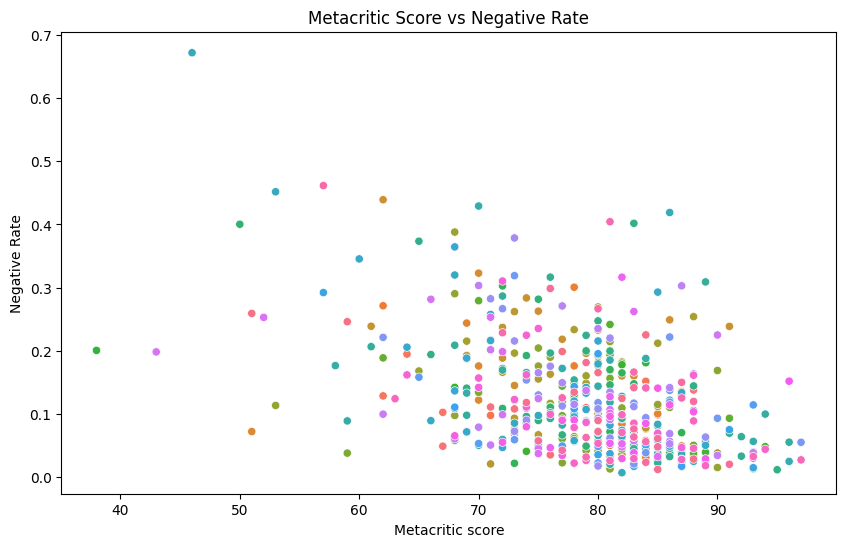

In [10]:
# 부정 리뷰 비율 계산
analyze_game01['Negative_Rate'] = analyze_game01['Negative'] / (analyze_game01['Positive'] + analyze_game01['Negative'])

# Seaborn을 이용한 산점도 그래프
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analyze_game01, x='Metacritic score', y='Negative_Rate', hue='Name')
plt.xlabel('Metacritic score')
plt.ylabel('Negative Rate')
plt.title('Metacritic Score vs Negative Rate')

# 범례를 표시하지 않음
plt.legend().set_visible(False)

# 마우스 포인트에 정보 표시
def on_hover(event):
    if event.xdata is not None and event.ydata is not None:
        index = analyze_game01.index[(analyze_game01['Metacritic score'] == event.xdata) & (analyze_game01['Negative_Rate'] == event.ydata)].tolist()
        if index:
            game_name = analyze_game01.at[index[0], 'Name']
            neg_rate = analyze_game01.at[index[0], 'Negative_Rate']
            plt.gca().set_title(f"Game: {game_name}\nNegative Rate: {neg_rate:.2%}")

plt.gcf().canvas.mpl_connect('motion_notify_event', on_hover)
plt.show()


---
먼가 예상치랑은 많이 달라져서 상관분석부터 해보기로 함

긍정 부정 ccu가 관련이 좀 높고 플레이타임끼리 좀 높은게 특징

그래서 메타스코어를 빼고 실제 게임을 하는 유저들간의 긍정 부정을 한번 봐야겠음 -> 일단 미뤄두고 다른 랭킹들도 확인하기로 함

In [11]:
games_df03 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')

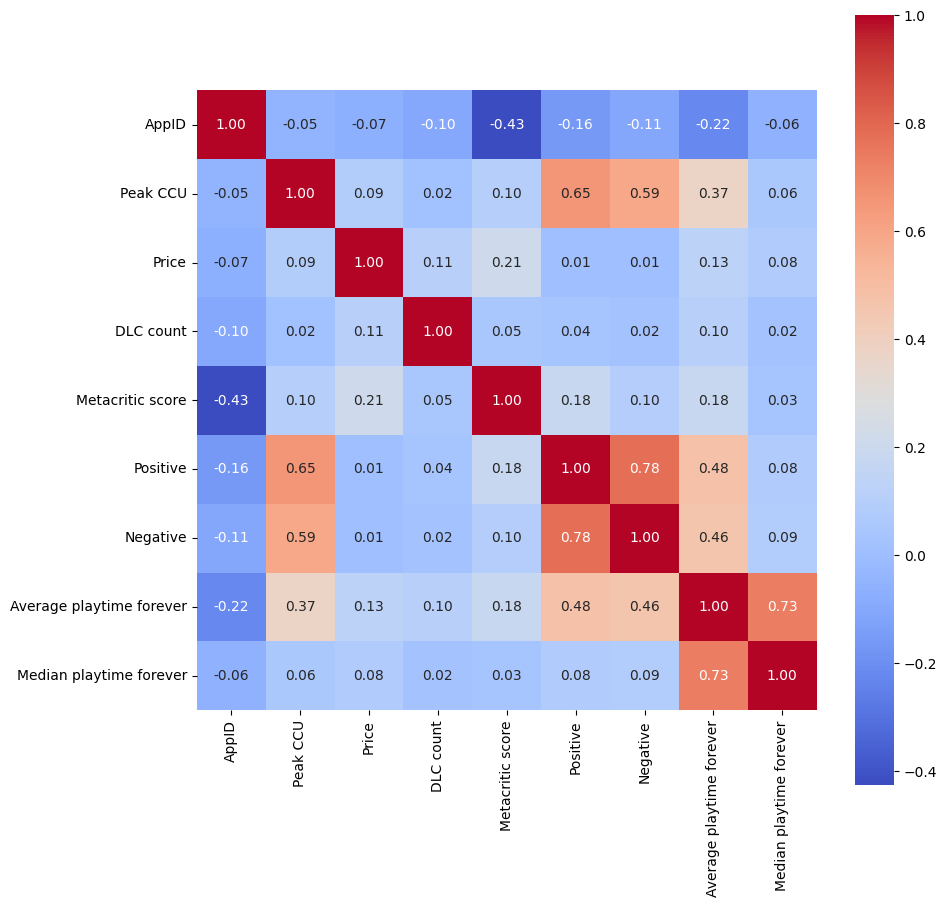

In [12]:
# 숫자형 변수들만 골라내어 상관계수를 계산합니다.
corr = games_df03.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.show()

---
개발사 부터 보는 메타스코어 게임 랭킹

현재 생각은 표현하기도 힘들거같고 표 이상의 정보를 가지기는 힘들꺼같다고 생각
이건 나중에 링크를 걸거나 하면서 카테고리식으로 보여줄 때 정도 간신히 쓰일꺼같음

In [13]:
games_df02 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')
selected_column02 = ['AppID', 'Name', 'Peak CCU', 'Price', 'Metacritic score', 'Positive', 'Negative', 'About the game', 'Website',
                     'Developers', 'Publishers','Genres', 'Tags', 'Age_Category']
analyze_game02 = games_df02[selected_column02]
analyze_game02 = analyze_game02[analyze_game02['Metacritic score'] != 0]

In [15]:
avg_score_and_info = analyze_game02.groupby('Developers').agg({
    'Metacritic score': ['mean', 'count'],
    'Name': lambda x: ', '.join(x),
    'Price': lambda x: ', '.join(x.astype(str)),
}).sort_values(by=('Metacritic score', 'mean'), ascending=False)

In [18]:
avg_score_and_info.head(15)

Metacritic score        \
                                                         mean count   
Developers                                                            
ZA/UM                                               97.000000     1   
ATLUS                                               97.000000     1   
2K Boston,2K Australia                              96.000000     1   
Rockstar North                                      96.000000     1   
Irrational Games,Virtual Programming (Linux)        94.000000     1   
Santa Monica Studio                                 93.000000     1   
Larian Studios                                      93.000000     1   
Bay 12 Games                                        93.000000     1   
Beat Games                                          93.000000     1   
Rockstar Games                                      93.000000     1   
Supergiant Games                                    93.000000     1   
tobyfox                                             92.000000     1   
Valve                                               91.222222     9   
Black Tabby Games                                   91.000000     1   
Polytron Corporation                                91.000000     1   

                                                                                           Name  \
                                                                                       <lambda>   
Developers                                                                                        
ZA/UM                                                             Disco Elysium - The Final Cut   
ATLUS                                                                           Persona 5 Royal   
2K Boston,2K Australia                                                                BioShock™   
Rockstar North                                                               Grand Theft Auto V   
Irrational Games,Virtual Programming (Linux)                                  BioShock Infinite   
Santa Monica Studio                                                                  God of War   
Larian Studios                                    Divinity: Original Sin 2 - Definitive Edition   
Bay 12 Games                                                                     Dwarf Fortress   
Beat Games                                                                           Beat Saber   
Rockstar Games                                                            Red Dead Redemption 2   
Supergiant Games                                                                          Hades   
tobyfox                                                                               Undertale   
Valve                                         Portal, Dota 2, Counter-Strike: Source, Portal...   
Black Tabby Games                                                             Slay the Princess   
Polytron Corporation                                                                        FEZ   

                                                                                          Price  
                                                                                       <lambda>  
Developers                                                                                       
ZA/UM                                                                                     39.99  
ATLUS                                                                                     59.99  
2K Boston,2K Australia                                                                      0.0  
Rockstar North                                                                              0.0  
Irrational Games,Virtual Programming (Linux)                                              29.99  
Santa Monica Studio                                                                       49.99  
Larian Studios                                                                            44.99  
Bay

---
개발별 평균 플레아티임 랭킹을 보기로함

차이가 생각보다 큼 개발사별 게임이 뭔지 비교는 천천히 주말에 할 생각

In [ ]:
games_df04 = pd.read_csv('/content/drive/MyDrive/sidepro/games_final.csv')
games_df04

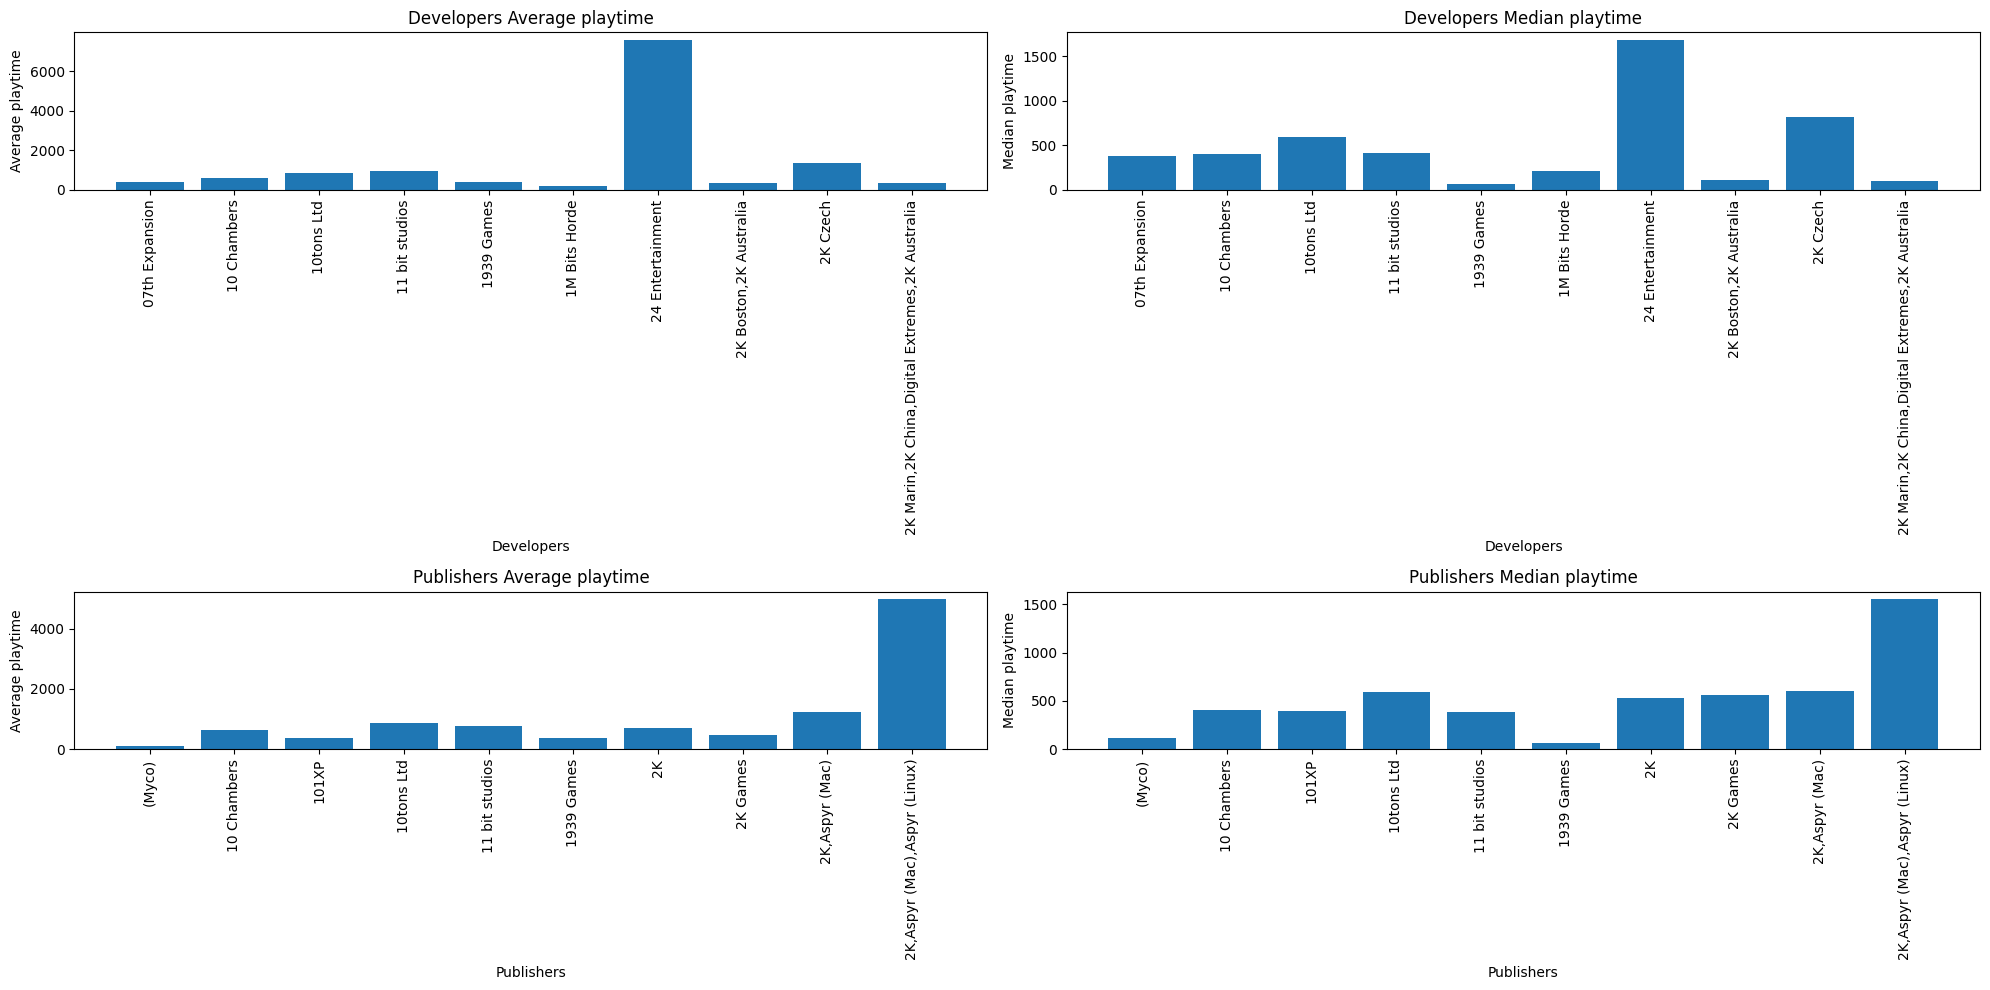

In [27]:
# 개발사와 발행사별 각각 평균 플레이타임과 중앙값 플레이타임 계산
dev_avg_playtime = games_df04.groupby('Developers')['Average playtime forever'].mean()
dev_med_playtime = games_df04.groupby('Developers')['Median playtime forever'].mean()
pub_avg_playtime = games_df04.groupby('Publishers')['Average playtime forever'].mean()
pub_med_playtime = games_df04.groupby('Publishers')['Median playtime forever'].mean()

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0, 0].bar(dev_avg_playtime[:10].index, dev_avg_playtime[:10])
ax[0, 0].set_title('Developers Average playtime')
ax[0, 0].set_xlabel('Developers')
ax[0, 0].set_ylabel('Average playtime')
ax[0, 0].tick_params(axis='x', rotation=90)

ax[0, 1].bar(dev_med_playtime[:10].index, dev_med_playtime[:10])
ax[0, 1].set_title('Developers Median playtime')
ax[0, 1].set_xlabel('Developers')
ax[0, 1].set_ylabel('Median playtime')
ax[0, 1].tick_params(axis='x', rotation=90)

ax[1, 0].bar(pub_avg_playtime[:10].index, pub_avg_playtime[:10])
ax[1, 0].set_title('Publishers Average playtime')
ax[1, 0].set_xlabel('Publishers')
ax[1, 0].set_ylabel('Average playtime')
ax[1, 0].tick_params(axis='x', rotation=90)

ax[1, 1].bar(pub_med_playtime[:10].index, pub_med_playtime[:10])
ax[1, 1].set_title('Publishers Median playtime')
ax[1, 1].set_xlabel('Publishers')
ax[1, 1].set_ylabel('Median playtime')
ax[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

---
지원 언어 갯 수 및 DLC 총 갯수에 따른 게임 랭킹

시각화는 좀 어떤걸 기준으로 할 지 데이터를 좀 더 봐야할듯 개발사나 공급사나 지금 , 로 묶여있는게 너무많아서...

In [28]:
games_df04['Language Count'] = games_df04['Supported languages'].str.split(',').str.len()
games_df04['Total Score'] = games_df04['Language Count'] + games_df04['DLC count']
language_dlc_ranking = games_df04.sort_values(by='Total Score', ascending=False)
language_dlc_ranking

,AppID,Name,Peak CCU,Price,DLC count,About the game,Supported languages,Website,Metacritic score,Positive,Negative,Average playtime forever,Median playtime forever,Developers,Publishers,Genres,Tags,Age_Category,Language Count,Total Score
96,24010,Train Simulator Classic,1286,24.99,678,YOUR CLASSIC RAIL HOBBY Welcome to the ultimat...,"['English', 'French', 'Italian', 'German', 'Sp...",https://live.dovetailgames.com/live/train-simu...,0,16408,7387,2793,434,Dovetail Games,Dovetail Games - Trains,Simulation,"Simulation,Trains,Singleplayer,Realistic,Drivi...",전체이용가,8,686
503,363890,RPG Maker MV,1016,15.99,579,POWERFUL enough for a developer SIMPLE enough ...,"['English', 'French', 'Italian', 'German', 'Sp...",http://www.rpgmakerweb.com/,0,5791,520,4310,734,"Gotcha Gotcha Games,KADOKAWA,Yoji Ojima",Degica,"Design & Illustration,Web Publishing","RPGMaker,Game Development,RPG,Anime,GameMaker,...",전체이용가,12,591
1041,1096900,RPG Maker MZ,516,47.99,386,The RPG Maker Series' Newest Offering: RPG Mak...,"['English', 'Japanese', 'French', 'Italian', '...",NaN,0,790,194,832,1353,"Gotcha Gotcha Games,KADOKAWA,Yoji Ojima",Degica,"RPG,Design & Illustration,Web Publishing","RPG,Anime,Game Development,RPGMaker,JRPG,Party...",전체이용가,11,397
703,582010,Monster Hunter: World,24736,29.99,200,Welcome to a new world! Take on the role of a ...,"['English', 'French', 'Italian', 'German', 'Sp...",http://www.monsterhunterworld.com/,88,306872,51885,10717,3278,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",Action,"Co-op,Multiplayer,Action,Open World,RPG,Third ...",전체이용가,13,213
942,1446780,MONSTER HUNTER RISE,99009,59.99,135,Rise to the challenge and join the hunt! In Mo...,"['English', 'French', 'Italian', 'German', 'Sp...",https://www.monsterhunter.com/rise-steam/,87,37494,5799,4462,2676,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",Action,"Action,Online Co-Op,RPG,Hunting,Action RPG,JRP...",전체이용가,13,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1164690,Wigmund,1,14.99,0,Two twin brothers. A fellowship of warriors. A...,['English'],https://www.wigmundrpg.com,0,58,22,56,56,The Scholastics,The Scholastics,RPG,"RPG,Action RPG,Dragons,Open World,Singleplayer...",전체이용가,1,1
665,938000,Land of Puzzles: Elven Princess,0,4.99,0,In Land of Puzzles: Elven Princess the king an...,['English'],NaN,0,9,9,0,0,Ripknot Systems,Ripknot Systems,"Casual,Indie","Casual,Indie,Puzzle,Strategy,Relaxing,2D,Singl...",전체이용가,1,1
661,938820,Puzzle Monarch: Egypt,0,4.99,0,An ancient tomb has been uncovered and it's fi...,['English'],NaN,0,8,20,0,0,Ripknot Systems,Ripknot Systems,"Casual,Indie,Strategy","Indie,Strategy,Casual,Puzzle,Relaxing,Singlepl...",전체이용가,1,1
653,1501420,Novena Diabolos,0,15.99,0,Welcome to Hope Hill Village! One human being ...,['English'],https://www.giikugames.com/,0,26,1,0,0,H5DEV Games,Giiku Games,"Adventure,Indie,RPG","Adventure,Visual Novel,RPG,Horror,Anime,Surviv...",전체이용가,1,1


---
연령별 플레이타임
분명 성인 수가 엄청 적고 전체이용가가 압도적으로 많은 수 였는데 플레이타임은 완전 다른걸 확인

    전체이용가   1888
    청소년       161
    성인         17
    어린이       16

In [29]:
age_playtime = games_df04.groupby('Age_Category')['Average playtime forever'].mean()
age_ccu = games_df04.groupby('Age_Category')['Peak CCU'].mean()
age_ccu

Age_Category
성인       20248.058824
어린이       8671.500000
전체이용가     3767.311970
청소년       8094.571429
Name: Peak CCU, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Gly

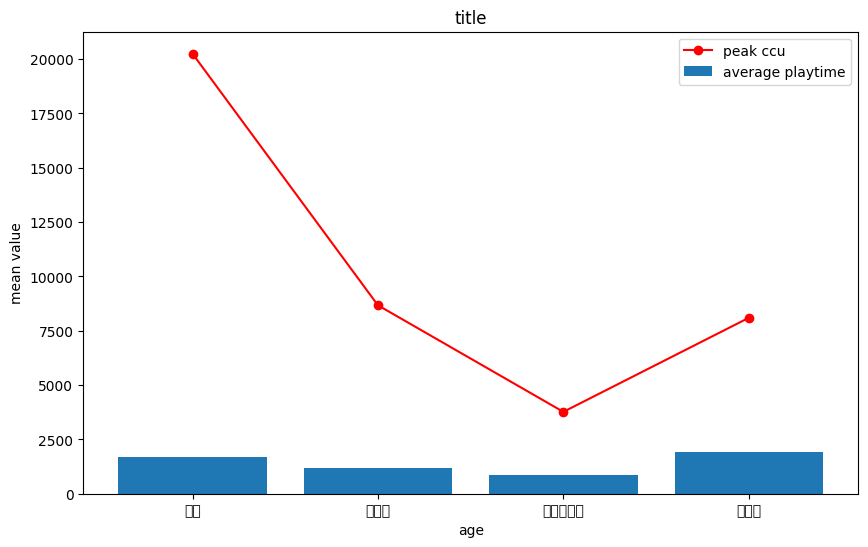

In [30]:
# 그래프에 사용할 데이터
age_playtime = games_df04.groupby('Age_Category')['Average playtime forever'].mean()
age_ccu = games_df04.groupby('Age_Category')['Peak CCU'].mean()

# 그래프 설정
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(age_playtime.index, age_playtime.values, label='average playtime')  # 막대 그래프로 평균 플레이타임 표시
plt.plot(age_ccu.index, age_ccu.values, marker='o', color='red', label='peak ccu')  # 선 그래프로 평균 동시 접속자 수 표시
plt.xlabel('age')  # x축 레이블 설정
plt.ylabel('mean value')  # y축 레이블 설정
plt.title('title')  # 그래프 제목 설정
plt.legend()  # 범례 표시

# 그래프 출력
plt.show()

---
가격이랑 품질 분석도 한번 해봄

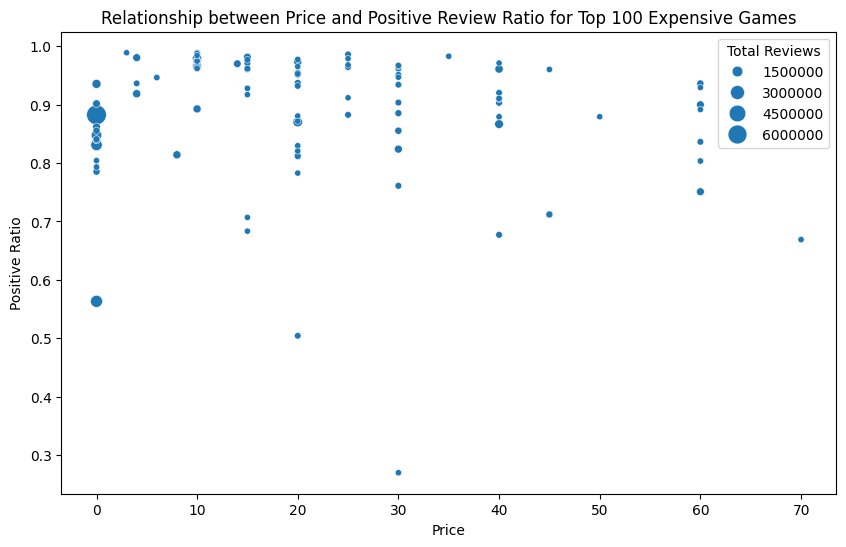

In [31]:
expensive_games = games_df04[games_df04['Price'] >= 0]
expensive_games['Total Reviews'] = expensive_games['Positive'] + expensive_games['Negative']
expensive_games['Positive Ratio'] = expensive_games['Positive'] / expensive_games['Total Reviews']
top_expensive_games = expensive_games.sort_values(by='Total Reviews', ascending=False).head(100)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_expensive_games, x='Price', y='Positive Ratio', size='Total Reviews', sizes=(20, 200))
plt.title('Relationship between Price and Positive Review Ratio for Top 100 Expensive Games')
plt.show()

In [33]:
fig = px.scatter(top_expensive_games, x='Price', y='Positive Ratio', size='Total Reviews', hover_data=['Name'])
fig.show()